Bagging & Boosting KNN & Stacking

Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Ensemble techniques combine multiple models to improve prediction accuracy and robustness.
- Bagging (Bootstrap Aggregating): Trains multiple models independently on random subsets of data (with replacement). It reduces variance and prevents overfitting.
- Boosting: Trains models sequentially, where each model focuses on correcting the errors of the previous one. It reduces bias and improves model performance


Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Random Forest reduces overfitting by averaging predictions from multiple decision trees trained on different data subsets and feature subsets.
- Key hyperparameters:
- n_estimators: Number of trees in the forest. More trees reduce variance.
- max_features: Number of features considered at each split. Lower values increase diversity among trees.


Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Stacking combines predictions from multiple base models using a meta-model. Unlike bagging/boosting, which use the same type of model, stacking can use different models (e.g., SVM, KNN, Logistic Regression).
Example: Combine predictions from Random Forest, KNN, and SVM using Logistic Regression as the final decision-maker


Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

OOB (Out-of-Bag) Score is the accuracy measured on data not included in the bootstrap sample for each tree.
It provides an unbiased estimate of model performance without needing a separate validation set, saving data and computation.


Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Error Handling | Focuses on misclassified samples | Minimizes loss function gradient | | Weight Adjustment | Increases weights of misclassified samples | Fits new model to residual errors | | Use Cases | Binary classification, spam detection | Regression, ranking, complex classification


Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables

CatBoost uses ordered target statistics and permutation-driven encoding to handle categorical variables internally. It avoids overfitting and eliminates the need for manual one-hot encoding or label encoding


Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Unscaled Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)

best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))

Unscaled Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Scaled Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Params: {'metric': 'manhattan', 'n_neighbors': 1}
Optimized Accuracy: 0.9629629629629629


Question 8 : PCA + KNN with Variance Analysis and Visualization

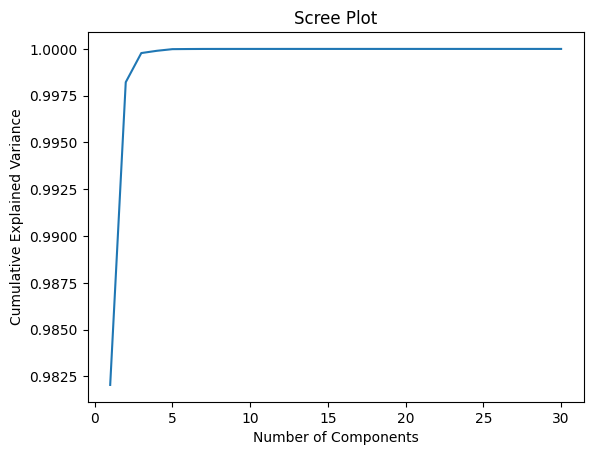

Original Accuracy: 0.9590643274853801
PCA Accuracy: 0.9532163742690059


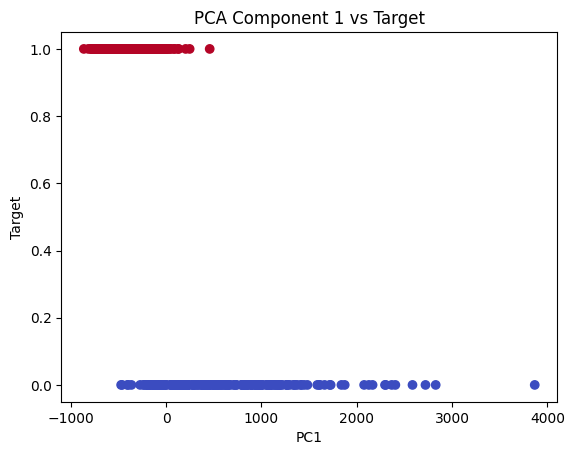

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)

pca = PCA().fit(X)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum())
plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Original Accuracy:", knn.score(X_test, y_test))

knn.fit(X_train_pca, y_train)
print("PCA Accuracy:", knn.score(X_test_pca, y_test))

plt.scatter(X_pca[:, 0], y, c=y, cmap='coolwarm')
plt.title("PCA Component 1 vs Target")
plt.xlabel("PC1")
plt.ylabel("Target")
plt.show()

Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis

MSE Euclidean: 3103.699882259301
MSE Manhattan: 3675.2741541435325


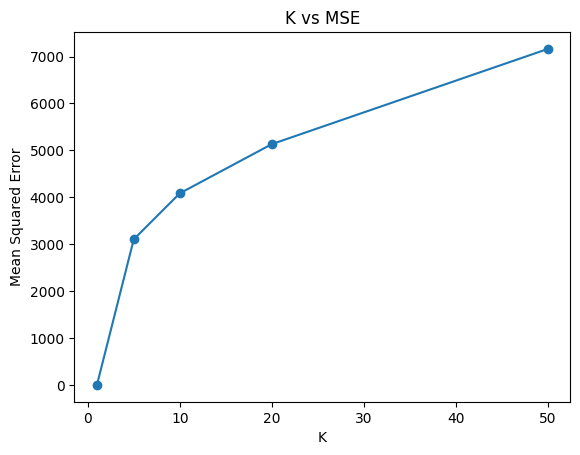

In [5]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean').fit(X, y)
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan').fit(X, y)

print("MSE Euclidean:", mean_squared_error(y, knn_euc.predict(X)))
print("MSE Manhattan:", mean_squared_error(y, knn_man.predict(X)))

mse_scores = []
k_values = [1, 5, 10, 20, 50]
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    mse_scores.append(mean_squared_error(y, model.predict(X)))

plt.plot(k_values, mse_scores, marker='o')
plt.title("K vs MSE")
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.show()

Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

In [10]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text), header=None)


df.columns = [f'col_{i}' for i in range(df.shape[1])]
df.rename(columns={f'col_{df.shape[1]-1}': 'Outcome'}, inplace=True)


imputer = KNNImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

start = time()
model_brute = KNeighborsClassifier(algorithm='brute').fit(X_train, y_train)
print("Brute Accuracy:", accuracy_score(y_test, model_brute.predict(X_test)))
print("Time:", time() - start)

start = time()
model_kd = KNeighborsClassifier(algorithm='kd_tree').fit(X_train, y_train)
print("KD-Tree Accuracy:", accuracy_score(y_test, model_kd.predict(X_test)))
print("Time:", time() - start)

start = time()
model_ball = KNeighborsClassifier(algorithm='ball_tree').fit(X_train, y_train)
print("Ball Tree Accuracy:", accuracy_score(y_test, model_ball.predict(X_test)))
print("Time:", time() - start)

Brute Accuracy: 0.6883116883116883
Time: 0.006146907806396484
KD-Tree Accuracy: 0.6883116883116883
Time: 0.007143259048461914
Ball Tree Accuracy: 0.6883116883116883
Time: 0.0065555572509765625
